Практическая работа № 7

Выполнил студент группы ББМО-02-23: Костомахин А.А.



In [11]:
#Подключение всех необходимых библеотек
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt


In [12]:
# Загрузка данных MNIST
train_images = tf.keras.datasets.mnist.load_data()[0][0] / 255.0

In [13]:
# Добавление одного измерения
train_images = np.expand_dims(train_images, axis=-1)

In [14]:
# Генератор
def build_generator():
    return tf.keras.Sequential([
        layers.Dense(128, activation='relu', input_dim=100),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Dense(784, activation='tanh'),
        layers.Reshape((28, 28, 1))
    ])

# Дискриминатор
def build_discriminator():
    return tf.keras.Sequential([
        layers.Conv2D(64, (3, 3), padding='same', input_shape=(28, 28, 1)),
        layers.LeakyReLU(),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(1, activation='sigmoid')
    ])

In [15]:
generator, discriminator = build_generator(), build_discriminator()
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# Создание GAN
gan = tf.keras.Model(*[(inp := layers.Input((100,))), discriminator(generator(inp))])
discriminator.trainable = False
gan.compile(optimizer='adam', loss='binary_crossentropy')

In [17]:
# Функция обучения GAN
def train_gan(generator, discriminator, gan, epochs=1000, batch_size=64):
    for epoch in range(epochs):
        # Обучение дискриминатора
        idx = np.random.randint(0, train_images.shape[0], batch_size // 2)
        real, noise = train_images[idx], np.random.normal(0, 1, (batch_size // 2, 100))
        fake = generator.predict(noise)
        d_loss_real = discriminator.train_on_batch(real, np.ones((batch_size // 2, 1)))
        d_loss_fake = discriminator.train_on_batch(fake, np.zeros((batch_size // 2, 1)))
        d_loss = 0.5 * (d_loss_real[0] + d_loss_fake[0])  # Используем только значения потерь

        # Обучение генератора
        g_loss = gan.train_on_batch(
            np.random.normal(0, 1, (batch_size, 100)), np.ones((batch_size, 1))
        )

        if epoch % 100 == 0:
            print(f'{epoch} [D loss: {d_loss}] [G loss: {g_loss}]')

# Обучение GAN
train_gan(generator, discriminator, gan)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0 [D loss: 0.6937656402587891] [G loss: [array(0.69738376, dtype=float32), array(0.69738376, dtype=float32), array(0.4375, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


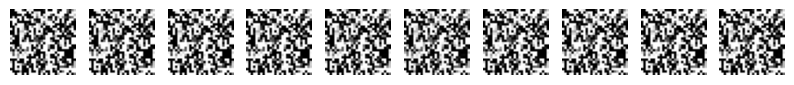

In [18]:
adversarial_images = generator.predict(np.random.normal(0, 1, (100, 100)))

plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(adversarial_images[i].reshape(28, 28), cmap='gray')  # Указан корректный размер
    plt.axis('off')
plt.show()

In [27]:
# Загрузка моделей и изменение размера изображений
models = [
    tf.keras.models.load_model('/content/mnist_model1.h5'),
    tf.keras.models.load_model('/content/mnist_model2.h5')
]

adv_images_resized = tf.image.resize(adversarial_images, (28, 28)).numpy().reshape(-1, 28, 28, 1)

# Оценка моделей на изменённых примерах
for i, model in enumerate(models, 1):
    _, acc = model.evaluate(adv_images_resized, np.ones((100, 10)))
    print(f'Accuracy of model{i} on adversarial GAN examples: {acc}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 239ms/step - accuracy: 0.0000e+00 - loss: 164.6917
Accuracy of model1 on adversarial GAN examples: 0.0
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step - accuracy: 0.0000e+00 - loss: 164.6917
Accuracy of model2 on adversarial GAN examples: 0.0


Вывод:

Оба варианта показали полное отсутствие точности при оценке на атакующих примерах, что свидетельствует об их абсолютной уязвимости к атакам, созданным с использованием генеративных состязательных сетей (GAN). Сгенерированные данные оказались достаточно реалистичными и сложными для корректной классификации, что подтверждает высокую эффективность GAN в формировании таких атак. Для повышения устойчивости моделей к подобным угрозам рекомендуется использовать защитные подходы, включая обучение на атакующих примерах (Adversarial Training), применение методов регуляризации и оптимизацию архитектуры моделей. Данные результаты акцентируют необходимость дальнейших исследований и разработки стратегий для повышения надежности классификаторов в условиях атак.